In [115]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# to display all columns without any truncation
pd.set_option('display.max_columns', None)

## Reading the File and doing basic checks

In [116]:
ad = pd.read_csv('data.csv')
# reading the data

In [117]:
ad.head(10) 
# taking a look at the data

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
5,False,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7440e233,84ebbcd4,1,0,17614,320,50,1993,2,1063,100084,33,10,3,30,17,0
6,False,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285aa37d,03683bd4,1,0,23369,320,50,2680,3,815,100156,42,10,3,30,7,0
7,False,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,140c5171,f51246a7,1,0,20984,320,50,2371,0,559,100217,46,10,3,30,10,0
8,False,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,848ff98a,45867dad,b4d21d55,1,2,20392,320,50,2340,3,41,100111,159,10,5,25,15,0
9,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ac116eec,5096d134,1,0,15705,320,50,1722,0,35,-1,79,10,4,24,16,0


In [118]:
#Checking for any missing values in any of the fields
ad.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

##### surpringly the dataset does not have any missing values!!!

In [119]:
ad.info()
# glancing at the metadata of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

## EDA

In [120]:
ad[['y','click','site_id']].groupby(['y','click']).count()
# to verify data in y and click seems same? 

,,site_id
y,click,
0,False,83019
1,True,16980


#### From the above output it is evident that 'y' and 'click' has same data in different data types.
#### Y / CLick shows it is imbalanced dataset

In [121]:
ad.month.value_counts()
# Same month for all data

10    99999
Name: month, dtype: int64

In [122]:
# Identifying Distinct values for each column
len_of_feature_count = []
for i in ad.columns[1:-1].tolist(): # Ignoring column Click and y 
    print(i, ':', len(ad[i].astype(str).value_counts()) ,'items')

C1 : 7 items
banner_pos : 7 items
site_id : 1485 items
site_domain : 1331 items
site_category : 19 items
app_id : 1354 items
app_domain : 96 items
app_category : 21 items
device_id : 16801 items
device_ip : 78013 items
device_model : 3145 items
device_type : 4 items
device_conn_type : 4 items
C14 : 1722 items
C15 : 8 items
C16 : 9 items
C17 : 399 items
C18 : 4 items
C19 : 64 items
C20 : 154 items
C21 : 60 items
month : 1 items
dayofweek : 7 items
day : 10 items
hour : 24 items


In [123]:
# dropping month field because it has only one value.
# dropping click because it is same as y
ad.drop(['month','click'], axis=1, inplace=True)

In [124]:
# Checking the relationship between day and dayofweek
ad[['day','dayofweek','site_id']].groupby(['day','dayofweek']).count()

,,site_id
day,dayofweek,
21,1,10213
22,2,13092
23,3,9519
24,4,8264
25,5,8258
26,6,9326
27,0,8034
28,1,13056
29,2,9742


From the above output, we can conclude we have ten days worth of data from 21st of october to 30th of october of any year.
And we have only one month of data, the month is not going to add any values to prediction.
 1,2,3 is repeated and more ads are pushed during these day of weeks compared to other days of week

In [125]:
# Create dual axis function to view comparision between Total Ads posted vs CTR % across dimensions
def dualaxes(fieldname):
    v1 = ad.groupby(fieldname,as_index=False).agg(total_count = ('y', 'count'), total_clicks = ('y', np.sum), CTR = ('y', np.mean) )

    # Create figure and axis #1

    fig, ax1 = plt.subplots(figsize=(20,6))
    # plot line chart on axis #1
    ax1.plot(v1[fieldname], v1['CTR'], color = 'green') 
    ax1.set_ylabel('CTR')
    ax1.set_ylim(0,1)
    ax1.grid(True) # turn off grid #1
    ax1.legend(['CTR%'], loc="upper left")
    # set up the 2nd axis
    ax2 = ax1.twinx()
    # plot bar chart on axis #2
    ax2.bar(v1[fieldname], v1['total_count'], width=.5, alpha=0.5, color= 'lightblue',) 
    ax2.grid(False) # turn off grid #2
    ax2.set_ylabel('Total Ads')
    ax2.legend(['Total ads'], loc="upper right")
    title = 'CTR% & Total Counts - by ' + fieldname
   
    plt.title(title)
    plt.xticks(v1[fieldname])
    return plt.show()



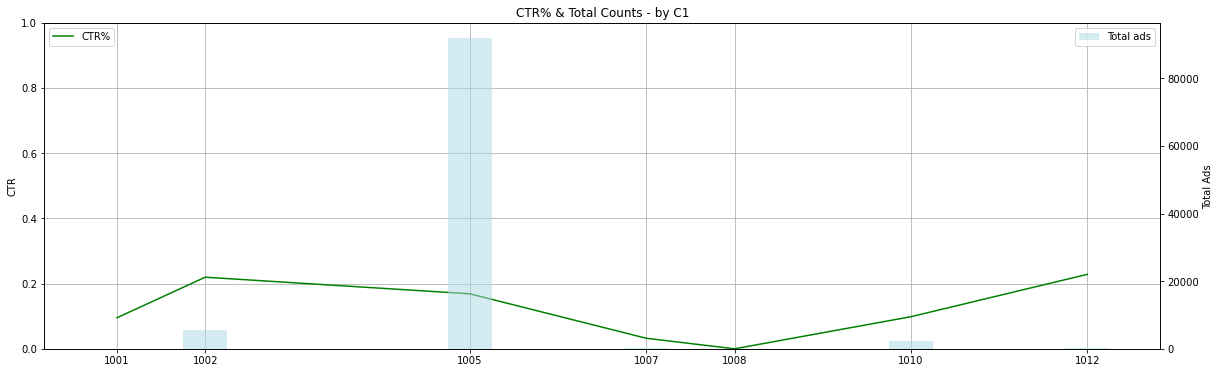

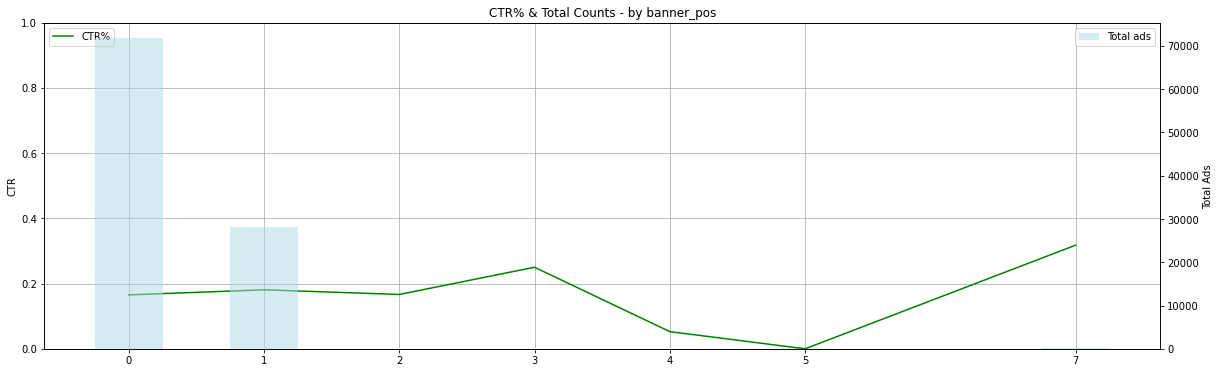

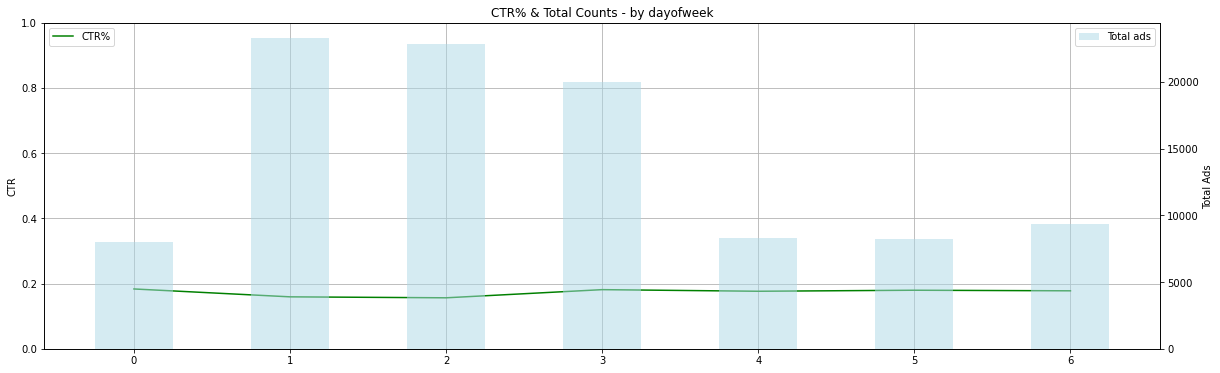

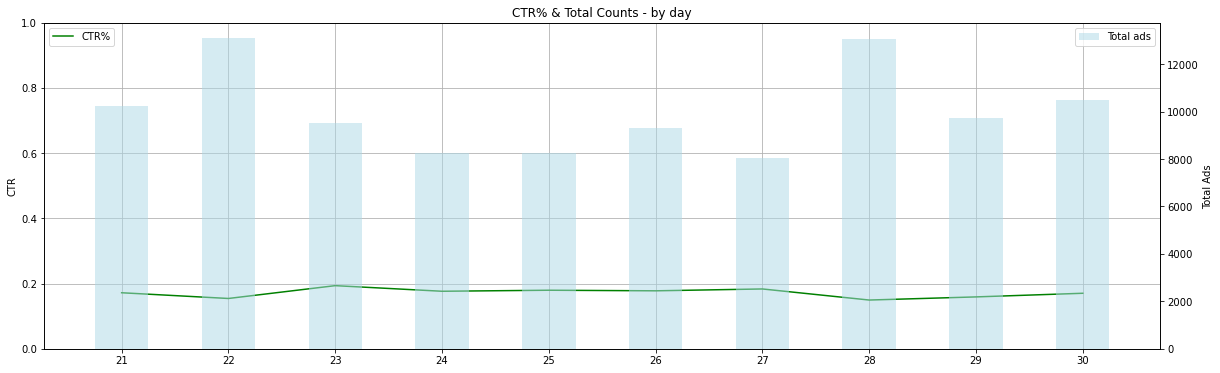

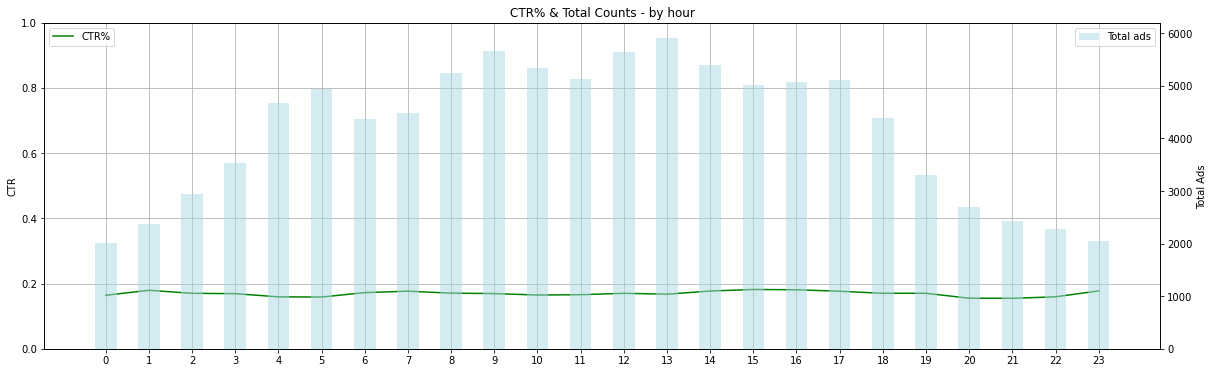

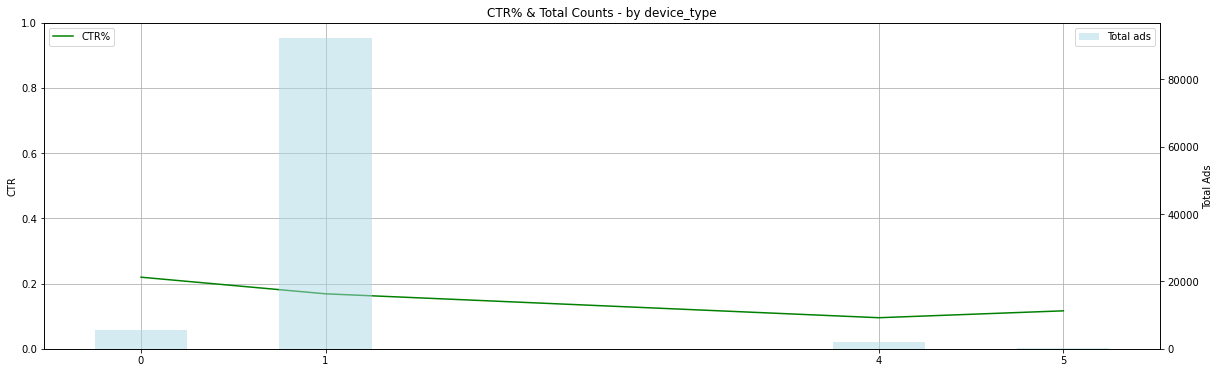

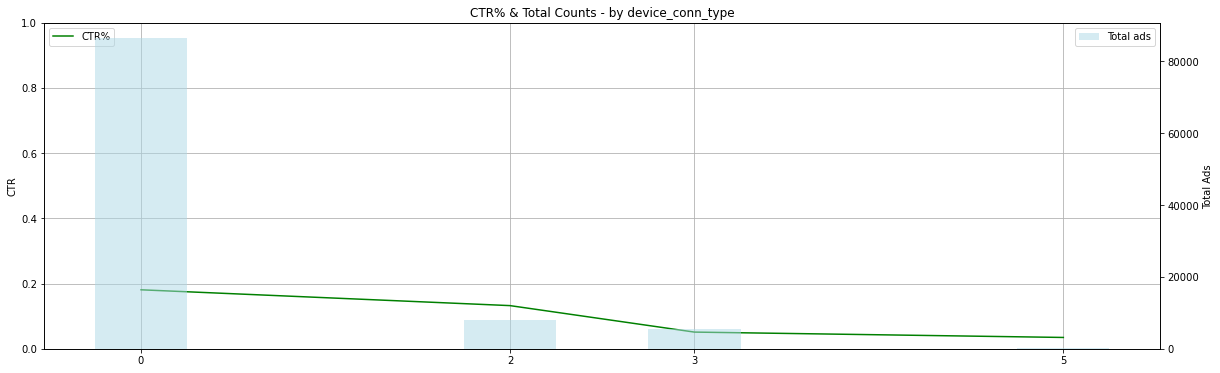

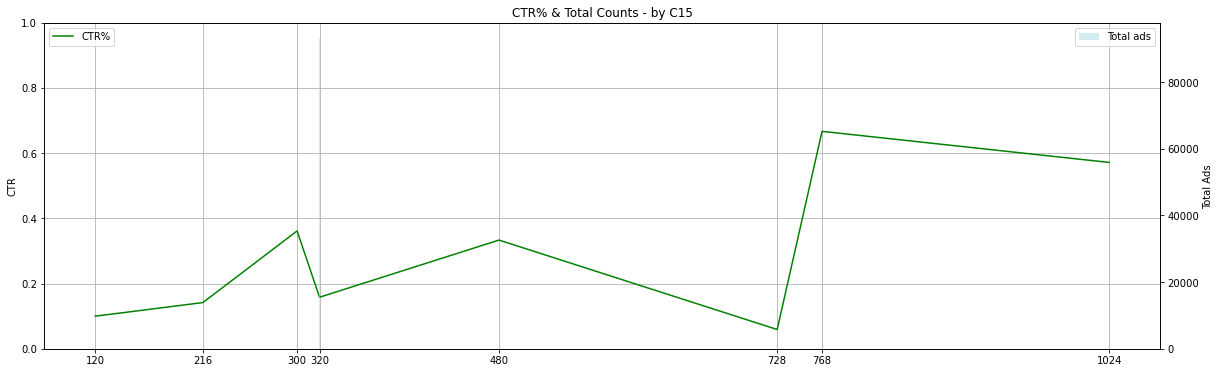

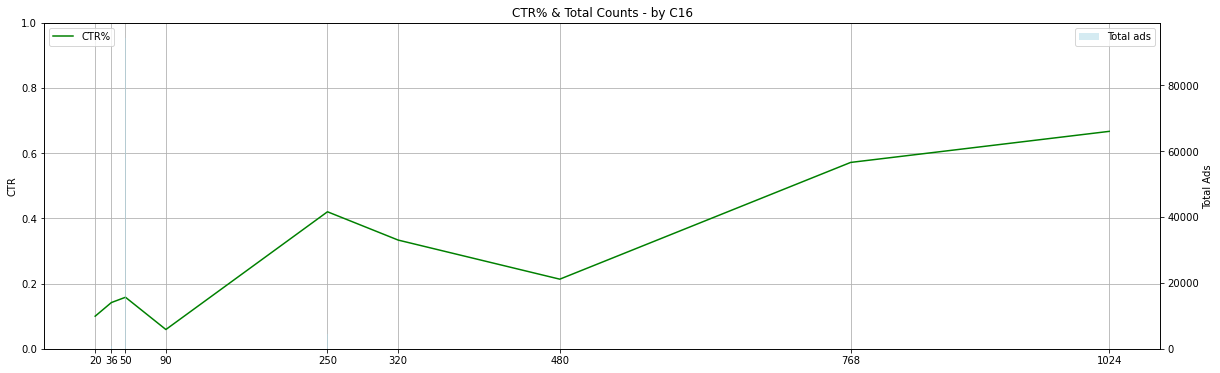

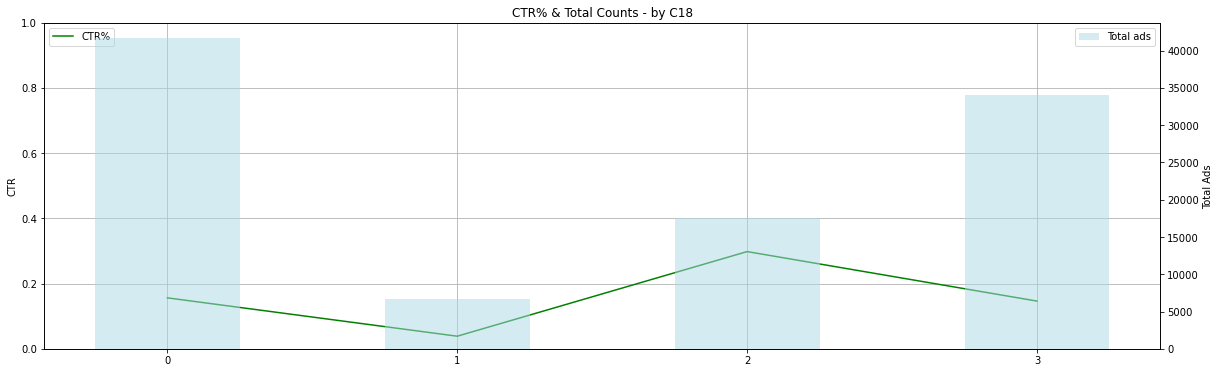

In [126]:
# Column list whose distinct values are less in number and interpretable values are only considered
col_lists  = list(ad[[ 'C1', 'banner_pos', 'dayofweek', 'day', 'hour', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18']].columns)
for i in col_lists:
    dualaxes(i)

# Obersevation on above series of charts : 
####      C1 : 
        1005 hold most no.of ads posted, 1002 has more CTR and second highest.
####      Banner position : 
        Banner 0 and 1 holds most ads posted with almost equal to avg CTR. 3 and 7 has more conversion with less ads posted
####      Day of week : 
        1,2,3 has more ads and slightly less than avg CTR, rest of the day of week has decent CTR.
#### Day : 
        23 -27 CTR stayed almost flat with similar no.of ads, Other days has high volume of ads and CTR lesser than 23-27. There is variance
#### Hour:
        CTR is almost flat and not very big jumps observed, point to note would be during daytime 6 AM -6 PM not musch flucation but 7 PM to 5 AM CTR is flucating a little to record both lowest and highest.
#### Device type and Connection type:
        These two variables has variance in Volume and CTR
#### C15, C16, C18
        CTR has most movements and volumes. But when we have more volume CTR is ironed out to 17%

# A look on all the other fields

In [127]:

def dualaxes_top_10 (fieldname):
    v1 = ad.groupby(fieldname,as_index=False).agg(total_count = ('y', 'count'), total_clicks = ('y', np.sum), CTR = ('y', np.mean) ).sort_values('total_count', ascending=False)[:10]

    # Create figure and axis #1

    fig, ax1 = plt.subplots(figsize=(20,6))
    # plot line chart on axis #1
    ax1.plot(v1[fieldname], v1['CTR'], color = 'green') 
    ax1.set_ylabel('CTR')
    ax1.set_ylim(0,1)
    ax1.grid(True) # turn off grid #1
    ax1.legend(['CTR%'], loc="upper left")
    # set up the 2nd axis
    ax2 = ax1.twinx()
    # plot bar chart on axis #2
    ax2.bar(v1[fieldname], v1['total_count'], width=.5, alpha=0.5, color= 'lightblue',) 
    ax2.grid(False) # turn off grid #2
    ax2.set_ylabel('Total Ads')
    ax2.legend(['Total ads'], loc="upper right")
    title = 'CTR% & Total Counts - by ' + fieldname
   
    plt.title(title)
    plt.xticks(v1[fieldname])
    return plt.show()

In [128]:
# Adding y to existing column list to exclude from Col2 list
col_lists.append('y')
col_lists

['C1',
 'banner_pos',
 'dayofweek',
 'day',
 'hour',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'y']

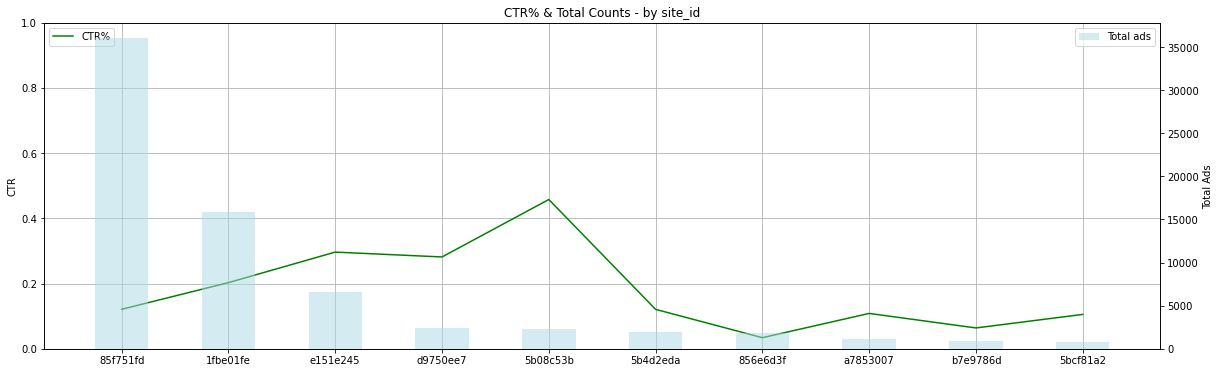

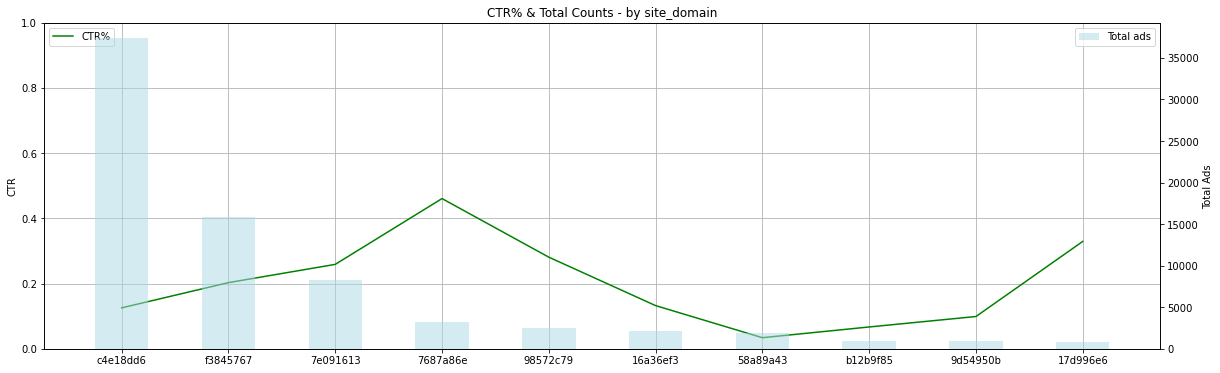

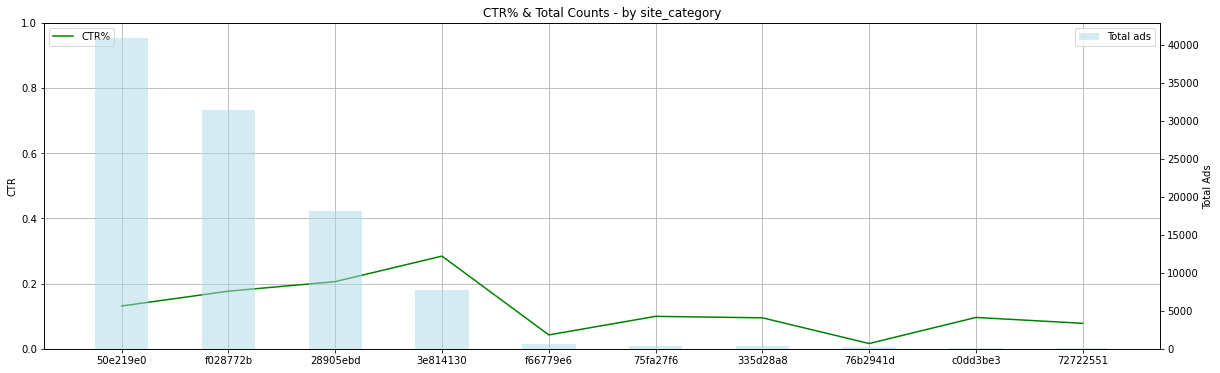

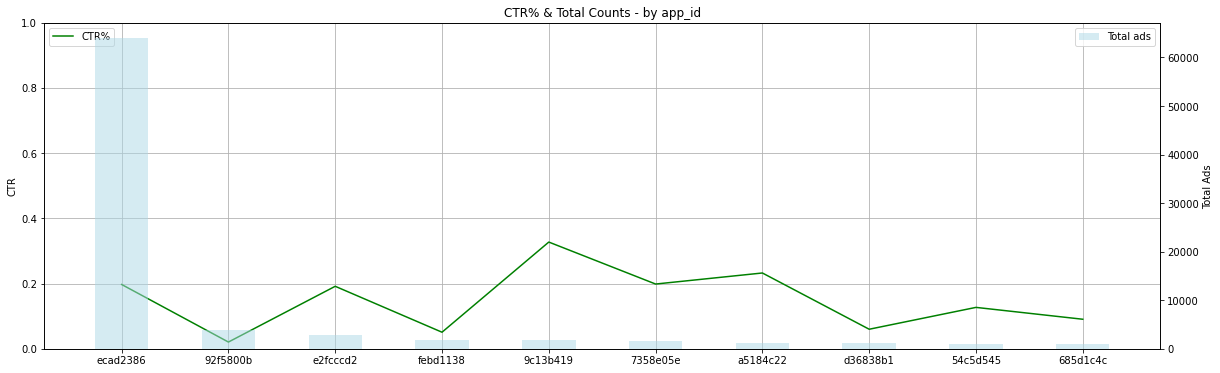

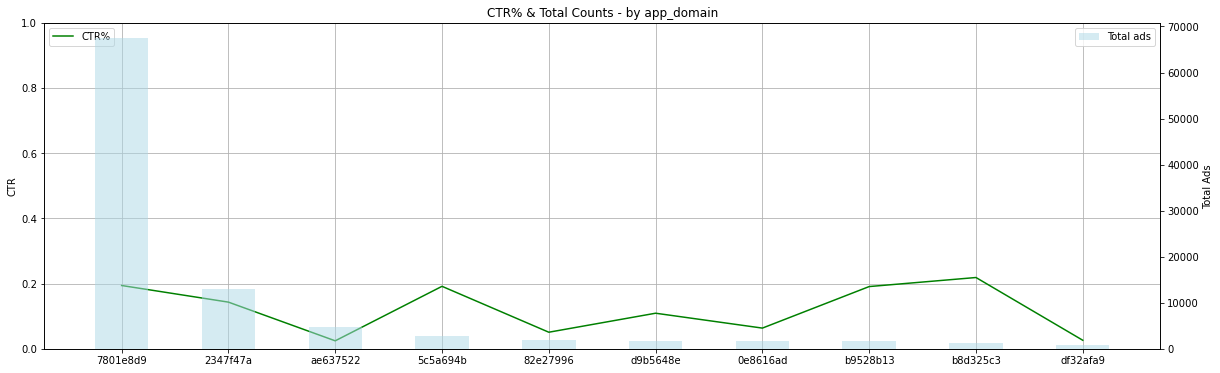

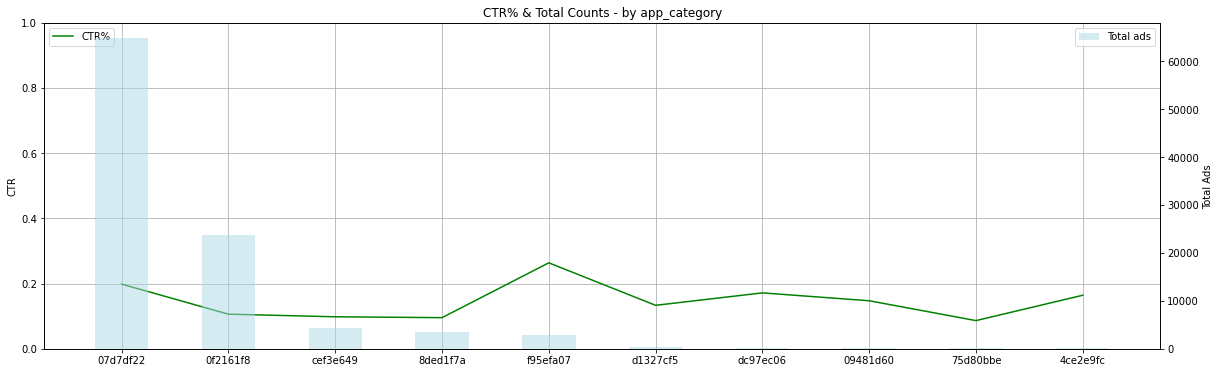

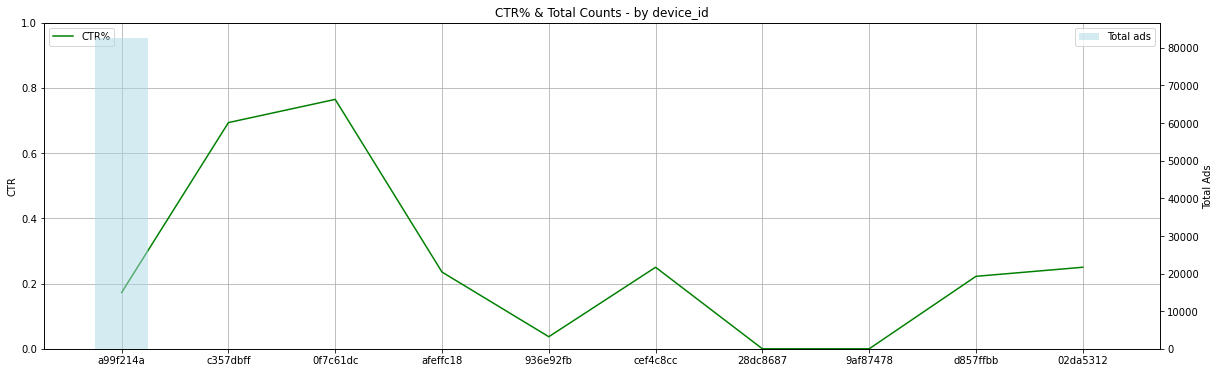

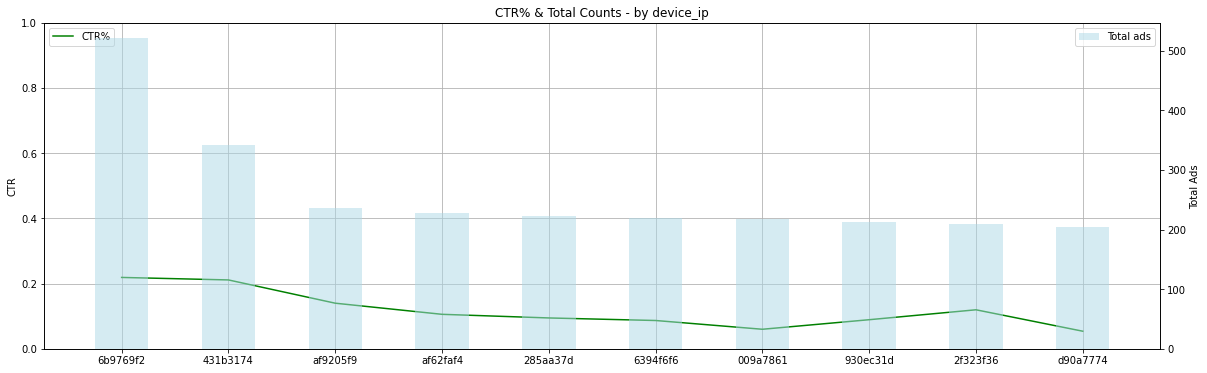

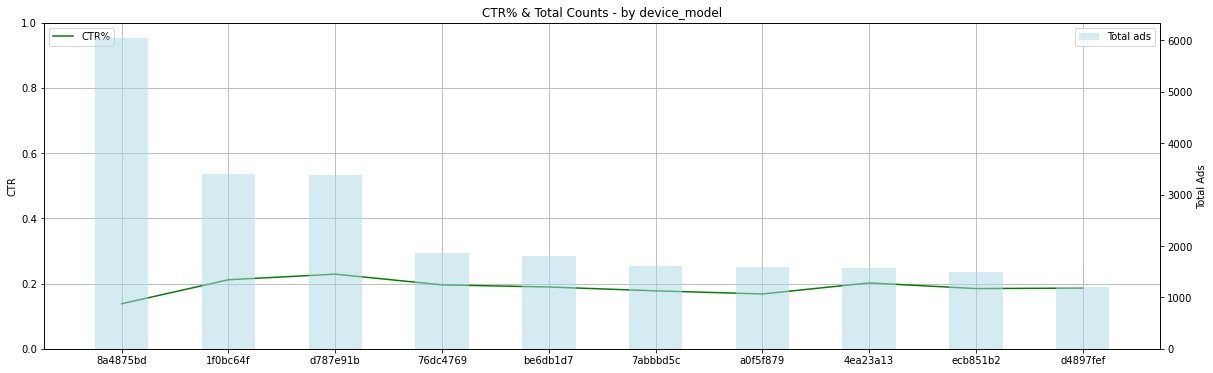

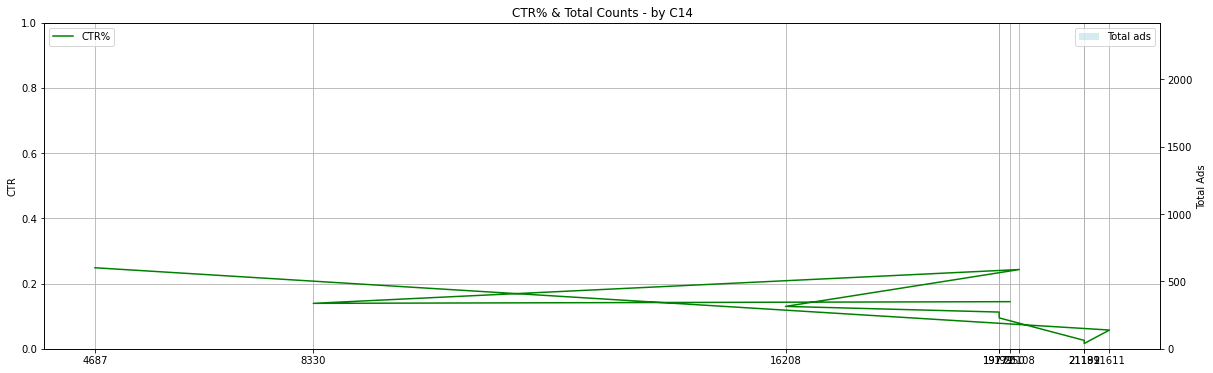

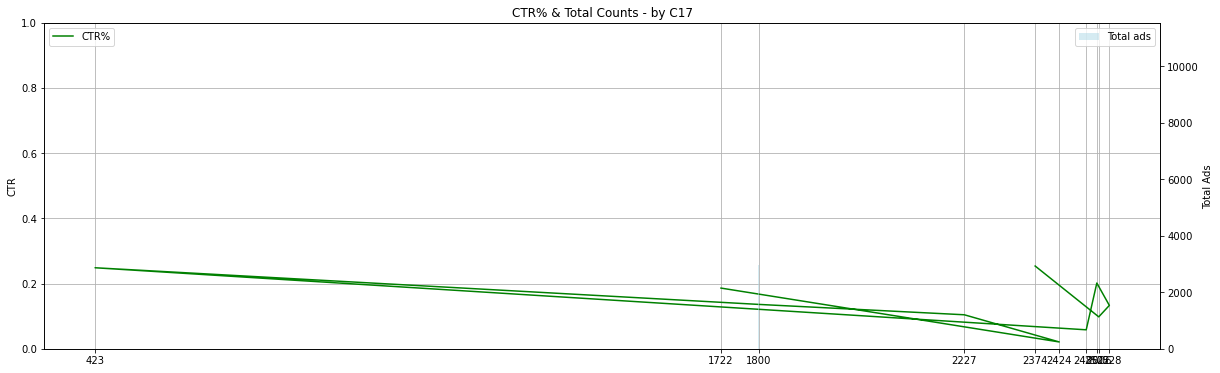

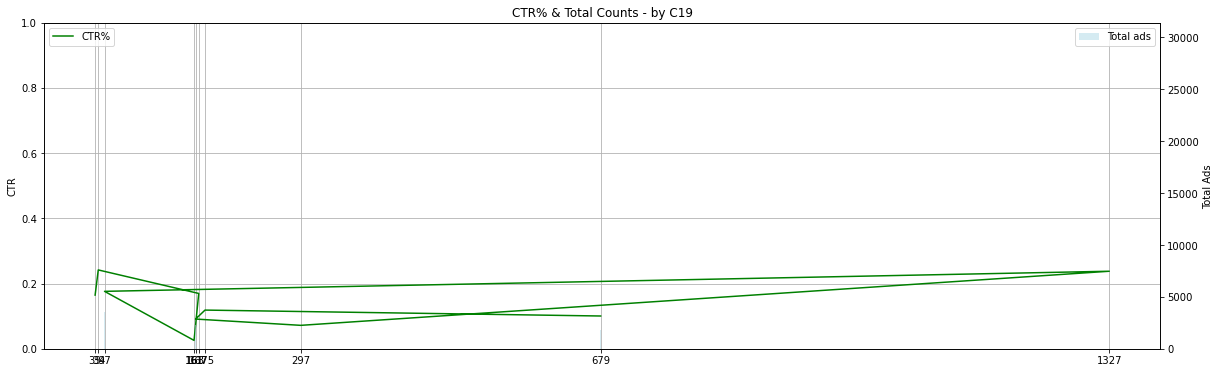

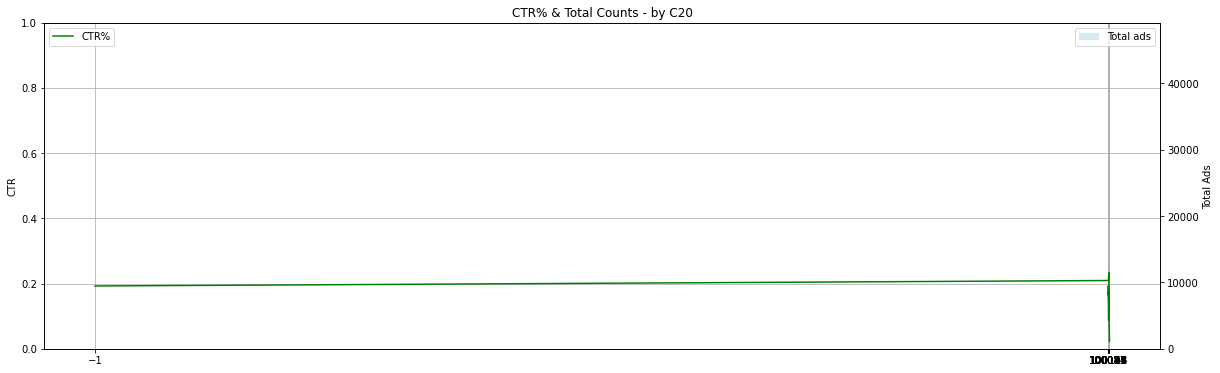

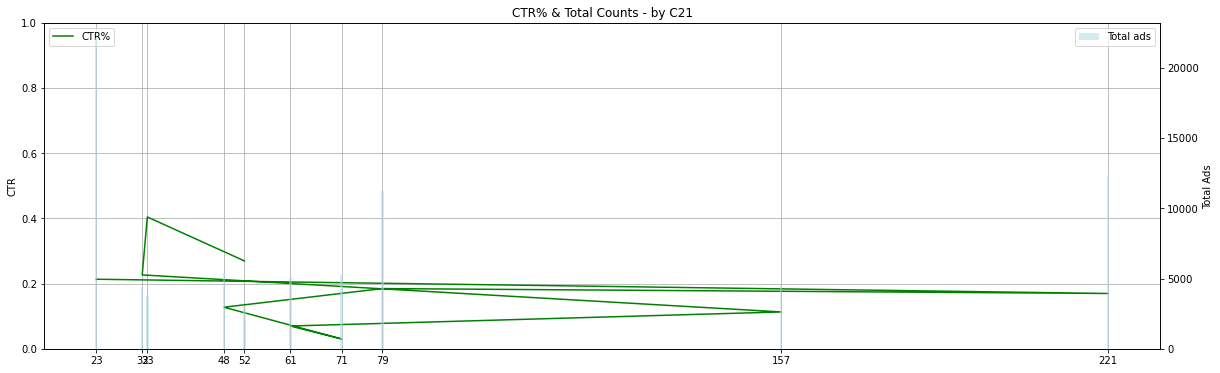

In [129]:
# Column list whose distinct values are less in number and interpretable values are only considered
col_lists_2  = ad.loc[:, ~ad.columns.isin(col_lists)]
for i in col_lists_2:
    dualaxes_top_10(i)

### CTR rate across Time dimensions, mostly a flat line for hour of day, day and day of week.

In [130]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test,y_train, y_test = train_test_split(ad.iloc[:,0:-1], ad.iloc[:,-1], random_state= 42, test_size=0.25)

In [132]:
y_test.shape

(25000,)

In [133]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.829


# Classification Model
## We are going to build three classification model based
1. Logistic regression
2. Decision tree
3. Ensemble - Random Forest

In [134]:
# List of column selected for onehot features
onehot_features = ['day', 'hour','banner_pos','dayofweek','site_category','app_category','device_type','device_conn_type']

In [135]:
ad_onehot = pd.get_dummies(ad, columns = onehot_features,drop_first=True)

In [136]:
ad_onehot.columns[10:]

Index(['C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'y', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'banner_pos_1',
       'banner_pos_2', 'banner_pos_3', 'banner_pos_4', 'banner_pos_5',
       'banner_pos_7', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'site_category_28905ebd',
       'site_category_335d28a8', 'site_category_3e814130',
       'site_category_42a36e14', 'site_category_50e219e0',
       'site_category_5378d028', 'site_category_70fb0e29',
       'site_category_72722551', 'site_category_75fa27f6',
       'site_category_76b2941d', 'site_category_8fd0aea4',
       'site_category_9ccfa2ea', 'site_category_a

# Split the ad_onehot into a training and test set. 



In [137]:
# All columns are features execpt for y and Non-numeric columns

X = ad_onehot.loc[:,~ad_onehot.columns.isin(['site_id', 'site_domain', 'app_id', 'app_domain',
       'device_id', 'device_ip', 'device_model','y'])]
X.head()

,C1,C14,C15,C16,C17,C18,C19,C20,C21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_42a36e14,site_category_50e219e0,site_category_5378d028,site_category_70fb0e29,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_8fd0aea4,site_category_9ccfa2ea,site_category_a818d37a,site_category_c0dd3be3,site_category_dedf689d,site_category_e787de0e,site_category_f028772b,site_category_f66779e6,app_category_09481d60,app_category_0f2161f8,app_category_0f9a328c,app_category_2281a340,app_category_4681bb9d,app_category_4ce2e9fc,app_category_7113d72a,app_category_75d80bbe,app_category_79f0b860,app_category_879c24eb,app_category_8ded1f7a,app_category_8df2e842,app_category_a3c42688,app_category_a7fd01ec,app_category_a86a3e89,app_category_cef3e649,app_category_d1327cf5,app_category_dc97ec06,app_category_f95efa07,app_category_fc6fa53d,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,1005,22683,320,50,2528,0,39,100075,221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1005,17037,320,50,1934,2,39,-1,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1005,22155,320,50,2552,3,167,100202,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1002,21591,320,50,2478,3,167,100074,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1005,15708,320,50,1722,0,35,-1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [138]:
# y is the target variable
y = ad_onehot.loc[:, ['y']]

# Logistic Regression

We will use Logistic Regression classification model to predict the classification.
When there is multiple dimension with lot of variance it can be used to predict the outcome

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(74999, 97)
(74999, 1)
(25000, 97)
(25000, 1)


In [140]:
# import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# initiate the logistic model
LR_model = LogisticRegression()

# train the model on the train dataset
LR_model.fit(X_train, y_train)

LogisticRegression()

In [141]:
# to see how each variable is affecting the results
log_odds = LR_model.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
C16,0.004718
C17,0.000084
site_category_3e814130,0.000017
site_category_28905ebd,0.000012
C18,0.000011
...,...
app_category_0f2161f8,-0.000030
site_category_50e219e0,-0.000033
C15,-0.000778
C1,-0.000923


0.82764
[[20674    51]
 [ 4258    17]]


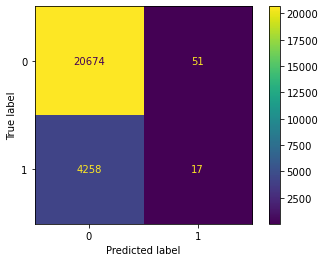

In [142]:
# Use trained model (LR_Model) to make predictions and determine the accuracy of your predictions.
y_pred = LR_model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(LR_model, X_test, y_test)
plt.show()

        Model is not able to predict 4258 clicks, which means we made this model biased to the imbalanced dataset.
        Our objective is to correctely predict when will a ad be clicked, keeping that in mind we did not do any good yet.


Plot ROC Score
ROC, the receiver operating characteristic curve is generally used when we 
need to bench mark any classification machine learning model. The ROC Curve is a plot between the False 
Positive (FP) and the True Positive (TP) rate at all possible thresholds between 0 (low) and 1 (high). The 
AUC, Area Under the ROC Curve, is a measure of performance across all probable limit values. 


In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LR_model.predict_proba(X_test)[:, 1])

0.6071234023942043

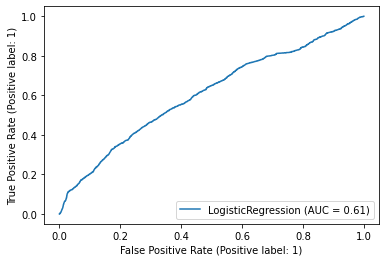

In [144]:
metrics.plot_roc_curve(LR_model, X_test, y_test) 
plt.show()

In [145]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     20725
           1       0.25      0.00      0.01      4275

    accuracy                           0.83     25000
   macro avg       0.54      0.50      0.46     25000
weighted avg       0.73      0.83      0.75     25000



# WEIGHTED LOGISTIC REGRESSION FOR IMBALANCED DATASET

In [146]:
w = {0:17, 1:83} # define class weights

# initiate the logistic model
LR_model2 = LogisticRegression(random_state=42, class_weight=w)

# train the model on the train dataset
LR_model2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 17, 1: 83}, random_state=42)

In [147]:
# to see how each variable is affecting the results
log_odds = LR_model2.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
C16,0.004708
C1,0.000538
C17,0.000099
site_category_28905ebd,0.000020
site_category_3e814130,0.000018
...,...
C14,-0.000032
app_category_0f2161f8,-0.000041
site_category_50e219e0,-0.000043
C15,-0.000453


0.60408
[[12784  7941]
 [ 1957  2318]]


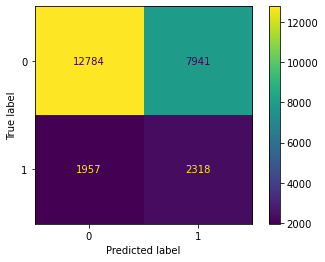

In [148]:
# Use trained model (LR_Model) to make predictions and determine the accuracy of your predictions.
y_pred = LR_model2.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(LR_model2, X_test, y_test)
plt.show()

In [149]:
roc_auc_score(y_test, LR_model2.predict_proba(X_test)[:, 1])

0.6056522859218815

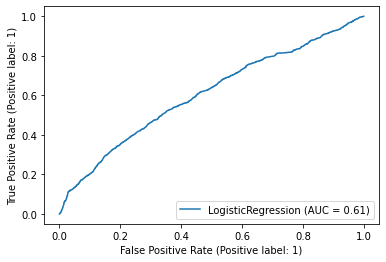

In [150]:
metrics.plot_roc_curve(LR_model2, X_test, y_test) 
plt.show()

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.62      0.72     20725
           1       0.23      0.54      0.32      4275

    accuracy                           0.60     25000
   macro avg       0.55      0.58      0.52     25000
weighted avg       0.76      0.60      0.65     25000



    With weighted Learning ROC_AUC score is not improved. So We will check at other Classification methods and comeback i need be.

# Decision Tree and hypertunning

    Decision Trees handle skewed classes better and we have only 17% clicks available.

In [152]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [153]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     20725
           1       0.55      0.07      0.12      4275

    accuracy                           0.83     25000
   macro avg       0.70      0.53      0.51     25000
weighted avg       0.79      0.83      0.77     25000



In [154]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[20491   234]
 [ 3985   290]]
0.83124


From above result, it is observed that False Negatives are reduced and True Positive is Increased. Let us see if we can improve the generalization better by tuning the hyper parameter. 

Lets understand max_depth parameter

In [155]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)} 

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [156]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077698,0.003182,0.007098,0.000527,1,{'max_depth': 1},0.830600,0.830600,0.830600,0.830600,0.830589,0.830598,0.000005,8,0.830597,0.830597,0.830597,0.830597,0.830600,0.830598,0.000001
1,0.098133,0.003026,0.007142,0.000805,2,{'max_depth': 2},0.830600,0.830600,0.830600,0.830600,0.830589,0.830598,0.000005,8,0.830597,0.830597,0.830597,0.830597,0.830600,0.830598,0.000001
2,0.123376,0.001601,0.007802,0.000595,3,{'max_depth': 3},0.832267,0.831467,0.831533,0.831867,0.831922,0.831811,0.000289,5,0.831747,0.831931,0.831931,0.831847,0.831817,0.831854,0.000070
3,0.150839,0.002237,0.007878,0.000805,4,{'max_depth': 4},0.832333,0.831267,0.831333,0.831800,0.831655,0.831678,0.000383,7,0.831797,0.832064,0.832047,0.831914,0.831900,0.831944,0.000099
4,0.175778,0.002565,0.007902,0.000880,5,{'max_depth': 5},0.833133,0.831200,0.831667,0.832667,0.832322,0.832198,0.000691,1,0.832347,0.833181,0.832631,0.832531,0.832850,0.832708,0.000287


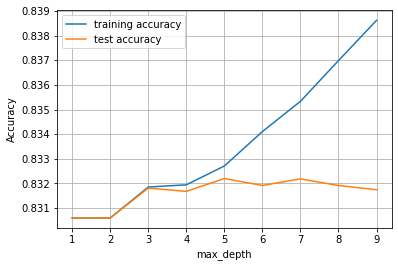

In [157]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


    Our Maximum depth is around 3

### Finding best min_samples_leaf for this model

In [158]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [159]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.503578,0.010820,0.011553,0.002516,5,{'min_samples_leaf': 5},0.807933,0.809600,0.808800,0.809000,0.808121,0.808691,0.000605,10,0.853381,0.852664,0.853831,0.853048,0.852717,0.853128,0.000436
1,0.437711,0.004987,0.009159,0.001058,25,{'min_samples_leaf': 25},0.830733,0.828200,0.831000,0.831200,0.831322,0.830491,0.001163,9,0.835414,0.836081,0.836281,0.835614,0.835850,0.835848,0.000311
2,0.414803,0.007077,0.009436,0.001401,45,{'min_samples_leaf': 45},0.832800,0.831200,0.831733,0.832267,0.832589,0.832118,0.000583,5,0.834297,0.834581,0.834647,0.834481,0.834600,0.834521,0.000124
3,0.398197,0.011206,0.008883,0.000829,65,{'min_samples_leaf': 65},0.832267,0.831467,0.831933,0.832600,0.831855,0.832024,0.000384,6,0.833797,0.834114,0.834214,0.833681,0.833917,0.833944,0.000197
4,0.387113,0.008831,0.008455,0.001070,85,{'min_samples_leaf': 85},0.833733,0.831200,0.832467,0.833933,0.832656,0.832798,0.000985,3,0.833531,0.833931,0.833881,0.833331,0.833800,0.833694,0.000228


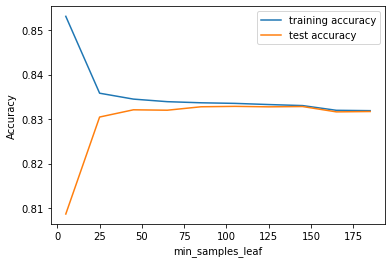

In [160]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

    We can observe that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

### Finding min_samples_split

In [161]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(0, 2000, 50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(0, 2000, 50)},
             return_train_score=True, scoring='accuracy')

In [162]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048476,0.001888,0.000000,0.000000,0,{'min_samples_split': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.499515,0.010477,0.009998,0.000914,50,{'min_samples_split': 50},0.819333,0.816267,0.816667,0.818133,0.815388,0.817158,0.001404,39,0.848214,0.849114,0.848964,0.849231,0.849050,0.848915,0.000361
2,0.486621,0.012162,0.010167,0.001589,100,{'min_samples_split': 100},0.824133,0.822800,0.824067,0.824200,0.822988,0.823638,0.000611,38,0.842047,0.841831,0.841564,0.841914,0.841967,0.841865,0.000166
3,0.473324,0.008606,0.009822,0.000380,150,{'min_samples_split': 150},0.826067,0.826267,0.826667,0.828867,0.827789,0.827131,0.001053,37,0.839947,0.839164,0.838947,0.838497,0.839100,0.839131,0.000470
4,0.464322,0.011691,0.008626,0.000793,200,{'min_samples_split': 200},0.828000,0.827867,0.828400,0.830400,0.829589,0.828851,0.000984,36,0.838264,0.838181,0.837847,0.837264,0.838067,0.837925,0.000359


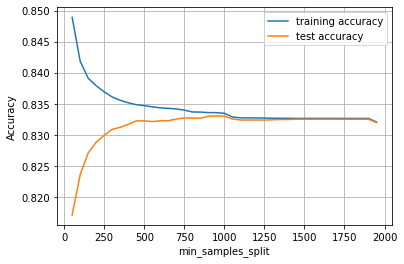

In [163]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


    1000 seems to be optimal min sample split

Grid Search to Find Optimal Hyperparameters

In [164]:
# Create the parameter grid between right and left of sweet spot obtained in above steps
param_grid = {
    'max_depth': range(3, 7),
    'min_samples_leaf': range(100, 150, 10),
    'min_samples_split': range(500, 1500, 100),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(100, 150, 10),
                         'min_samples_split': range(500, 1500, 100)},
             return_train_score=True, verbose=1)

In [165]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127267,0.004399,0.008636,0.000829,entropy,3,100,500,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.8306,0.831467,0.831467,0.830600,0.830589,0.830944,0.000426,361,0.830597,0.831931,0.831914,0.830597,0.830600,0.831128,0.000649
1,0.126795,0.002486,0.008628,0.001289,entropy,3,100,600,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.8306,0.831467,0.831467,0.830600,0.830589,0.830944,0.000426,361,0.830597,0.831931,0.831914,0.830597,0.830600,0.831128,0.000649
2,0.125107,0.002409,0.007638,0.000520,entropy,3,100,700,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.8306,0.831467,0.831467,0.830600,0.830589,0.830944,0.000426,361,0.830597,0.831931,0.831914,0.830597,0.830600,0.831128,0.000649
3,0.125358,0.000712,0.007782,0.000731,entropy,3,100,800,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.8306,0.831467,0.831467,0.830600,0.830589,0.830944,0.000426,361,0.830597,0.831931,0.831914,0.830597,0.830600,0.831128,0.000649
4,0.125622,0.001081,0.008031,0.000876,entropy,3,100,900,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.8306,0.831467,0.831467,0.830600,0.830589,0.830944,0.000426,361,0.830597,0.831931,0.831914,0.830597,0.830600,0.831128,0.000649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.196575,0.003472,0.008268,0.000828,gini,6,140,1000,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.8332,0.832333,0.833467,0.833267,0.833122,0.833078,0.000389,1,0.833064,0.833281,0.833014,0.833064,0.833083,0.833101,0.000093
396,0.197701,0.005541,0.007798,0.000979,gini,6,140,1100,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.8330,0.831267,0.832400,0.832867,0.832389,0.832384,0.000610,61,0.832264,0.832697,0.832414,0.832297,0.832417,0.832418,0.000153
397,0.196620,0.003497,0.007814,0.000770,gini,6,140,1200,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.8330,0.831267,0.832400,0.832867,0.832389,0.832384,0.000610,61,0.832264,0.832697,0.832414,0.832297,0.832417,0.832418,0.000153
398,0.197657,0.002287,0.007599,0.000491,gini,6,140,1300,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.8330,0.831267,0.832400,0.832867,0.832389,0.832384,0.000610,61,0.832264,0.832697,0.832414,0.832297,0.832417,0.832418,0.000153


In [166]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8330777749627754
DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=500)


In [184]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=100,
                                  min_samples_split=500)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=500,
                       random_state=100)

In [183]:
clf_gini.score(X_test,y_test)

0.83144

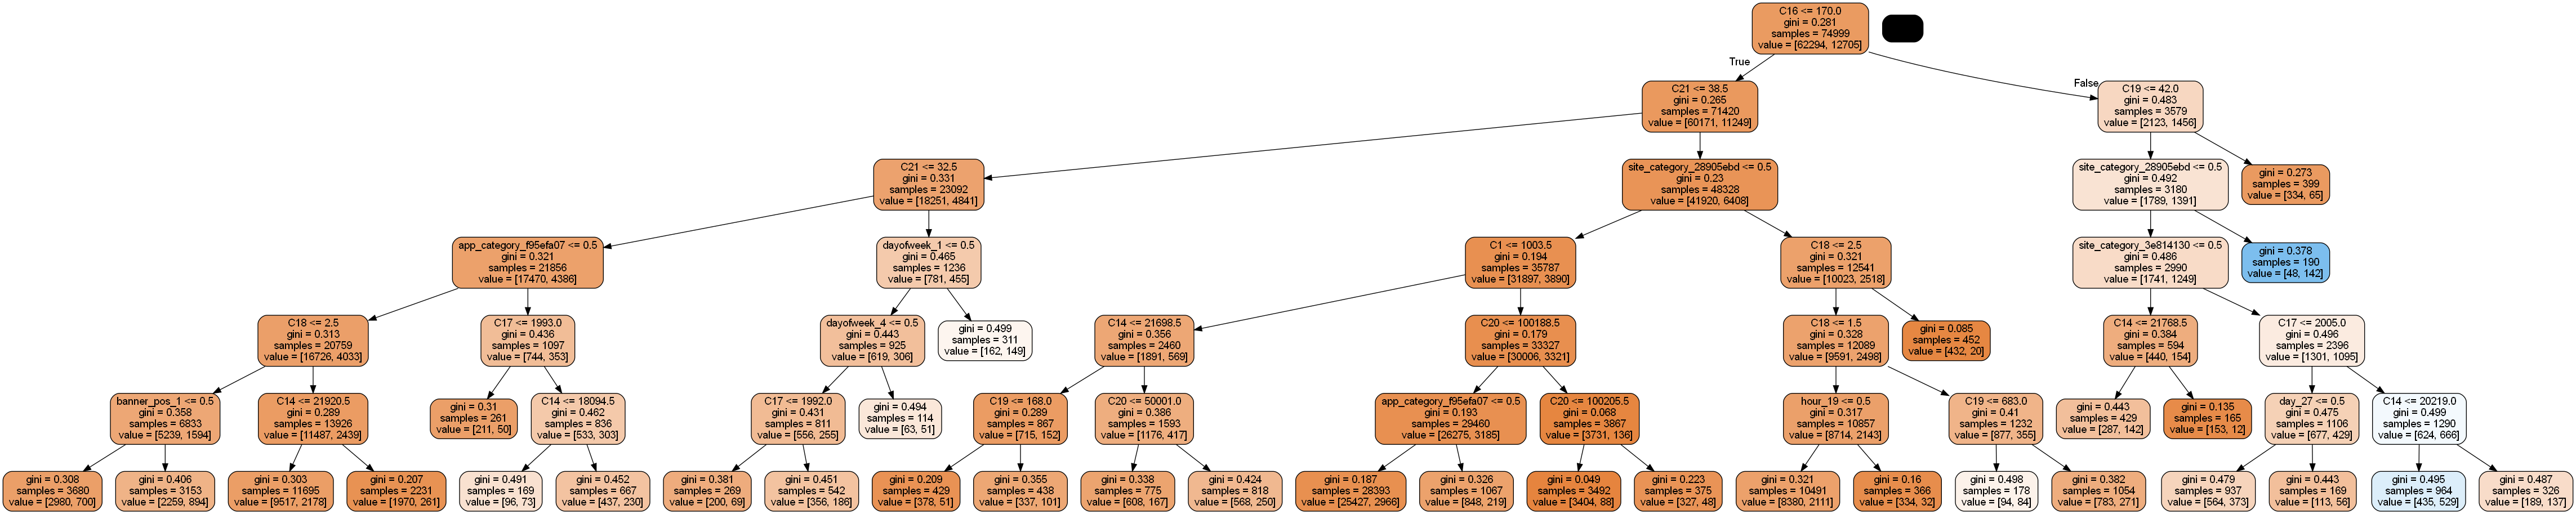

In [169]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=list(X),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [185]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.83144


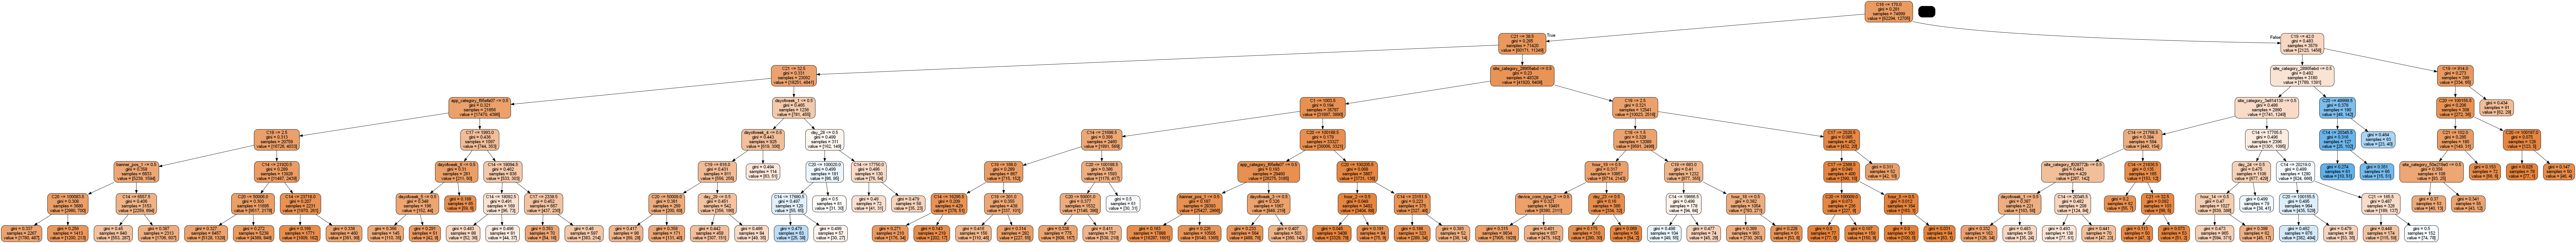

In [171]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=list(X),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [186]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt_default.predict_proba(X_test)[:, 1])

0.6517867761482515

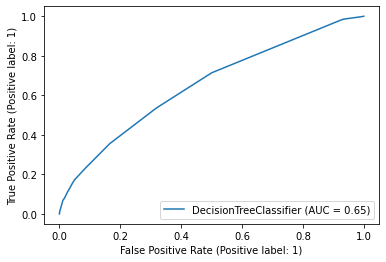

In [187]:
metrics.plot_roc_curve(dt_default, X_test, y_test) 
plt.show()

[[20493   232]
 [ 3982   293]]


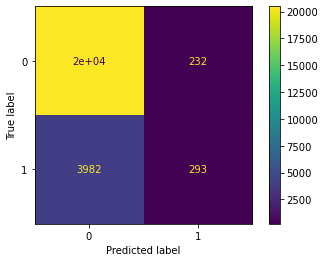

In [188]:
y_pred = clf_gini.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=clf_gini.classes_)
print(cnf_matrix)
metrics.plot_confusion_matrix(clf_gini, X_test, y_test)
plt.show()

# Random forest and hypertunning

It can perform both regression and classification tasks. A random forest produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm

In [174]:
#parameter import for RandomForest
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

#Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=155, max_features=55, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [175]:

print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     20725
           1       0.33      0.17      0.22      4275

    accuracy                           0.80     25000
   macro avg       0.59      0.55      0.55     25000
weighted avg       0.76      0.80      0.77     25000



## Now, lets find the best hyperparameter for Random forest tree

In [176]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [177]:
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.21965
----------------------------------------
Recall for Base Model 2:	 0.22596
----------------------------------------
Recall for Base Model 3:	 0.2269
----------------------------------------
Recall for Base Model 4:	 0.21614
----------------------------------------
Recall for Base Model 5:	 0.23626
----------------------------------------
Recall for Base Model 6:	 0.22526
----------------------------------------
Recall for Base Model 7:	 0.22596
----------------------------------------
Recall for Base Model 8:	 0.23064
----------------------------------------
Recall for Base Model 9:	 0.22667
----------------------------------------
Recall for Base Model 10:	 0.21942
----------------------------------------
Recall for Base Model 11:	 0.22901
----------------------------------------
Recall for Base Model 12:	 0.22269
----------------------------------------
Recall for Base Model 13:	 0.21684
----------------------------------------
Recall for Base Model 

In [178]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.7957
Testing Accuracy:		 0.7973
Acc. Difference:		 0.0016


In [179]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model_rf_oob.predict_proba(X_test)[:, 1])

0.6349021705852891

[[19232  1493]
 [ 3574   701]]


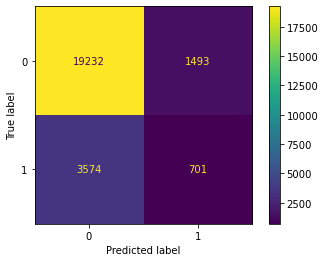

In [189]:
y_pred = model_rf_oob.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=clf_gini.classes_)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_rf_oob, X_test, y_test)
plt.show()

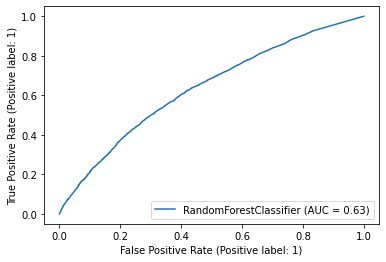

In [180]:
metrics.plot_roc_curve(model_rf_oob, X_test, y_test) 
plt.show()

# Observing which model gave us better results

| Model | AUC | Accuracy |
| --- | --- | --- |
| Logistic Regression | 0.607 | 0.83 |
| Logistic Regression with weight class | 0.605 | 0.60 |
| Decision Tree with best possible values | 0.652  |   0.83|
|Ensemble Random forest            |       0.635     | 0.8 |